In [1]:
import importlib
from optimize import data
importlib.reload(data)

<module 'optimize.data' from '/home/tanetakumi/hfq-optimizer/scripts/optimize/optimize/data.py'>

{'time': 4.97e-10, 'element': 'P(B1|X1|X1|X4)P(B2|X1|X1|X4)', 'phase': 1}
{'time': 8.99e-10, 'element': 'P(B1|X1|X1|X4)P(B2|X1|X1|X4)', 'phase': 2}
{'time': 1.2975e-09, 'element': 'P(B1|X1|X1|X4)P(B2|X1|X1|X4)', 'phase': 3}
  time                       element phase
0  0.0  P(B1|X1|X1|X4)P(B2|X1|X1|X4)     1
1  0.0  P(B1|X1|X1|X4)P(B2|X1|X1|X4)     2
2  0.0  P(B1|X1|X1|X4)P(B2|X1|X1|X4)     3
--- List of variables to optimize ---
              def     main      sub element    fix     shunt     dp  dpv  tmp
SQUIDL1     1.736    1.736    1.736       L  False      None   True    7    0
JJAREA1     0.562    0.562    0.562       B  False  JJSHUNT3   True    7    0
JJSHUNT1   16.905   16.905   16.905       R  False      None   True    7    0
PJJAREA1   20.000   20.000   20.000       B   True      None  False    7    0
SQUIDL2     1.750    1.750    1.750       L  False      None   True    7    0
JJAREA2     0.512    0.512    0.512       B  False  JJSHUNT3   True    7    0
JJSHUNT2   16.945   

/home/tanetakumi/hfq-optimizer/scripts/optimize/optimize/judge.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultframe = resultframe.append({'time':srs.index[i], 'element':column_name, 'phase':flag},ignore_index=True)
/home/tanetakumi/hfq-optimizer/scripts/optimize/optimize/judge.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultframe = resultframe.append({'time':srs.index[i], 'element':column_name, 'phase':flag},ignore_index=True)
/home/tanetakumi/hfq-optimizer/scripts/optimize/optimize/judge.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultframe = resultframe.append({'time':srs.index[i], 'element':column_name, 'phase':flag},ignore_index=True)


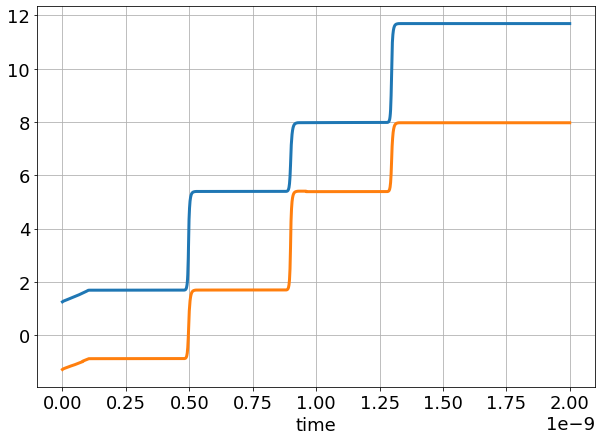

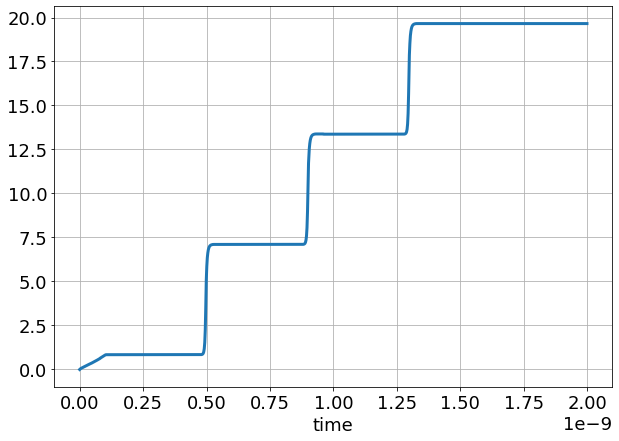

In [4]:
netlist_data4 = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.736)pH fcheck
L2                 3         4   #SQUIDL1(1.736)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.562, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT1(16.905)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.562)
R2                 2         5   #JJSHUNT1(16.905)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.75)pH fcheck
L2                 3         4   #SQUIDL2(1.75)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.512, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT2(16.945)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.512)
R2                 2         5   #JJSHUNT2(16.945)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(2.0)pH fcheck
L2                 3         4   #SQUIDL31(2.0)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.5, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(18)ohm
B2                 2         5   jjmod area=#JJAREA7(v=0.5)
R2                 2         5   #JJSHUNT3(20)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(374, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(18.255, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.261)pH fcheck
L4                      5        6    #DCHFQL3(2.00, fix = true, dp=False)pH fcheck
R1                      100      5    #DCHFQR2(35.57)ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1              1  2   #JTLL1(4.599, dpv = 15)pH fcheck
L2              2  3   #JTLL1(4.599)pH fcheck
L3              3  4   #JTLL1(4.599)pH fcheck
L4              4  5   #JTLL1(4.599)pH fcheck
X1    psquid3       3  0
X2    psquid3       5  0
R1               100  4   #JTLR1(45)ohm
R2               100  2   #JTLR1(45)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=0.5,fix = true, dp = false)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps


.print phase B1|X1|X1|X4
.print phase B2|X1|X1|X4

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
* 許容できるパルスの遅延
* PulseDelay=4.0e-11
"""
d3 = data.Data(netlist_data4, plot= True, show=True)
# df = d3.data_simulation(d3.vdf['sub'])
# df['SUM'] = df['P(B1|X1|X1|X4)'] + df['P(B2|X1|X1|X4)']
# df.plot(legend=False)
# d3.optimize("/home/tanetakumi/main/hfq-optimizer/template/optimize/hasegawadff4")